## Main Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mis

from sklearn.model_selection import train_test_split

## Loading datasets

In [4]:
df = pd.read_csv(r"D:\AAAAAAA\5_Machine Learning\Dataset For Machine Learning\titanic_2\train.csv")


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Show This Columns in DataFrame

In [7]:
pd.DataFrame((df.columns))

,0
0,PassengerId
1,Survived
2,Pclass
3,Name
4,Sex
5,Age
6,SibSp
7,Parch
8,Ticket
9,Fare


## Your Features

In [8]:
data_columns = df.columns
# data_columns
skpi_output = "Survived"
for i in df.columns:
    if i == skpi_output :
        continue
    print(i)


PassengerId
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Cabin
Embarked


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.shape

(891, 12)

## Check The Null

In [11]:
##Check isnull or not
missing_values = df.isna().sum()
print(f"missing_values: \n {missing_values} ")

missing_values: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 


## Show Null 

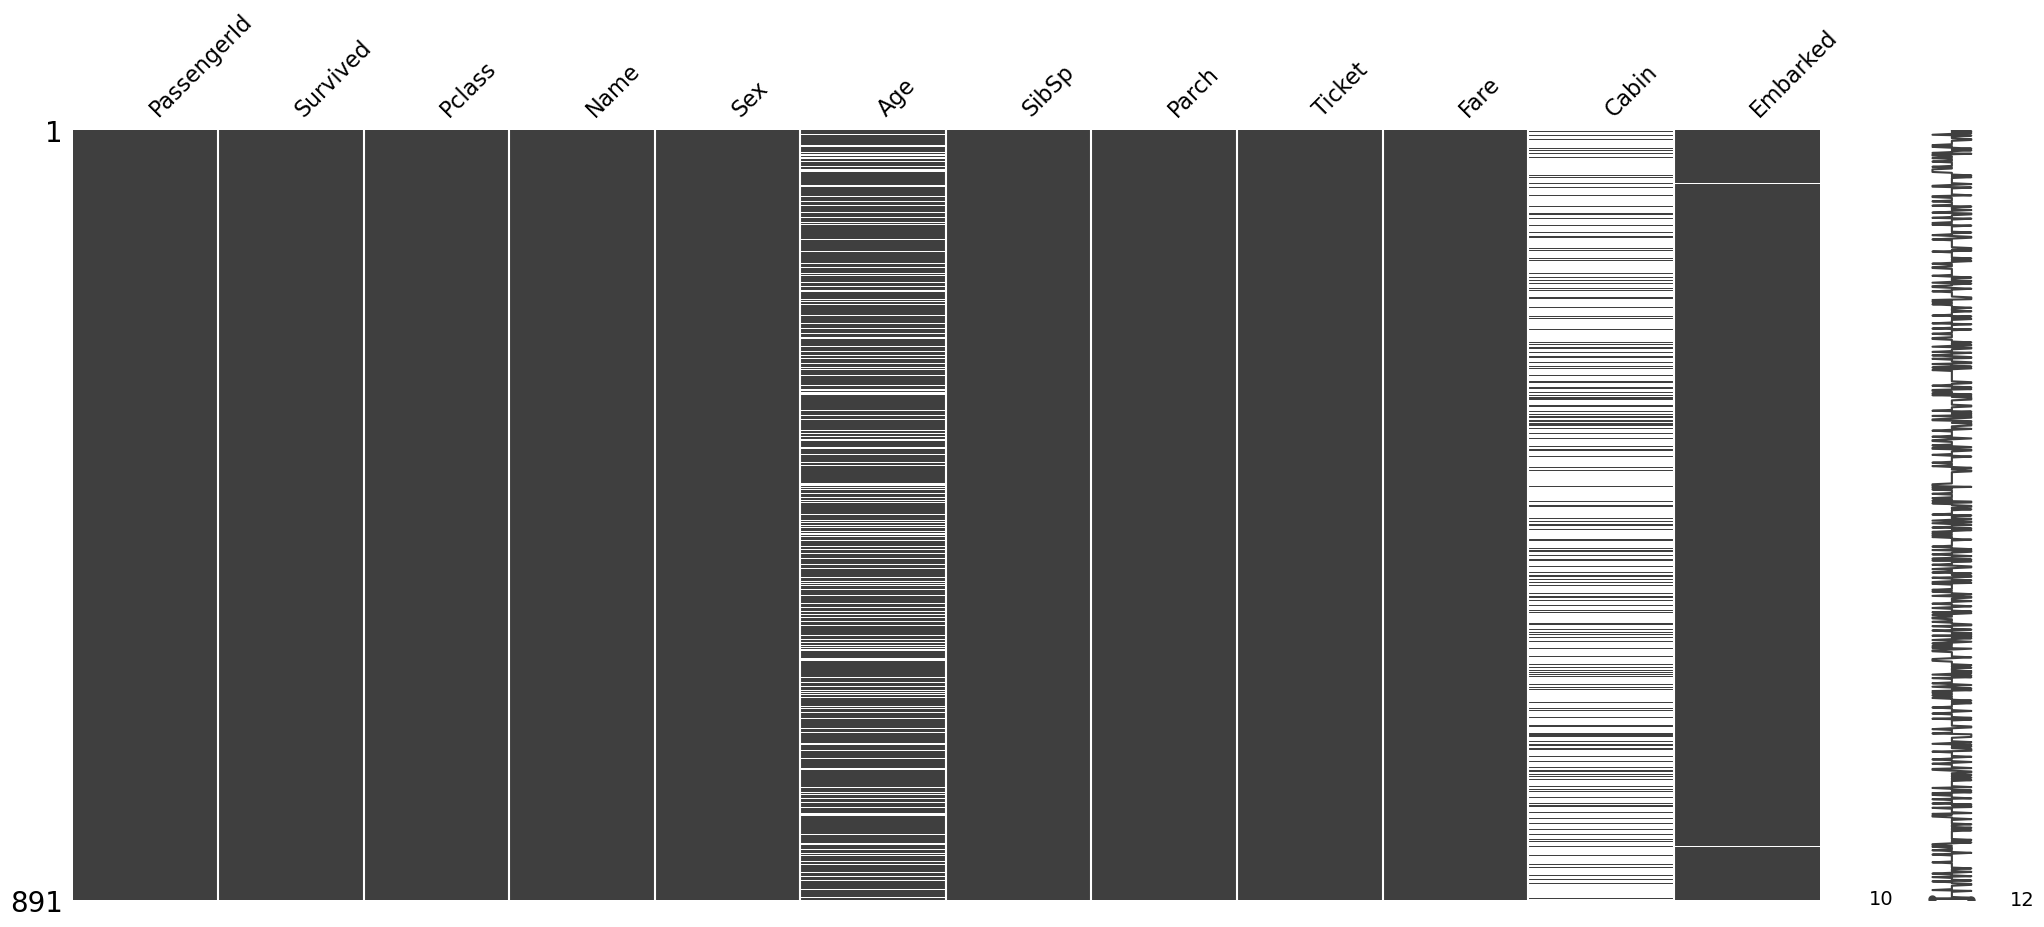

In [12]:
mis.matrix(df)
plt.show()

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
## check duplicated values in data
df.duplicated().any() 

False

In [15]:
pd.DataFrame(df["Survived"].describe())

,Survived
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


## Visualization 

In [16]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Show the diffrence between (Survived , Unsurvived)

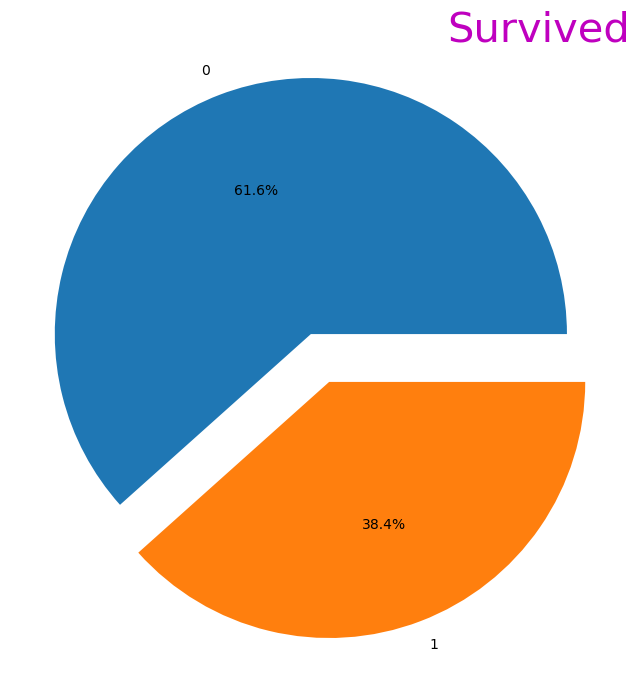

In [17]:
plt.figure(figsize=(8,8))
plt.pie([549 , 342] , labels=["0" , "1"] , explode=[0.1 , 0.1] , autopct="%1.1f%%")
plt.axis("equal")
plt.title("Survived" , fontsize=30 , loc="right" , c="m")
plt.show()

### drop some Feature

In [18]:
df = df.drop(columns=["PassengerId" , "Name" , "Ticket" , "Cabin"] , axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [19]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

## Show the diffrence between (Male , Female)

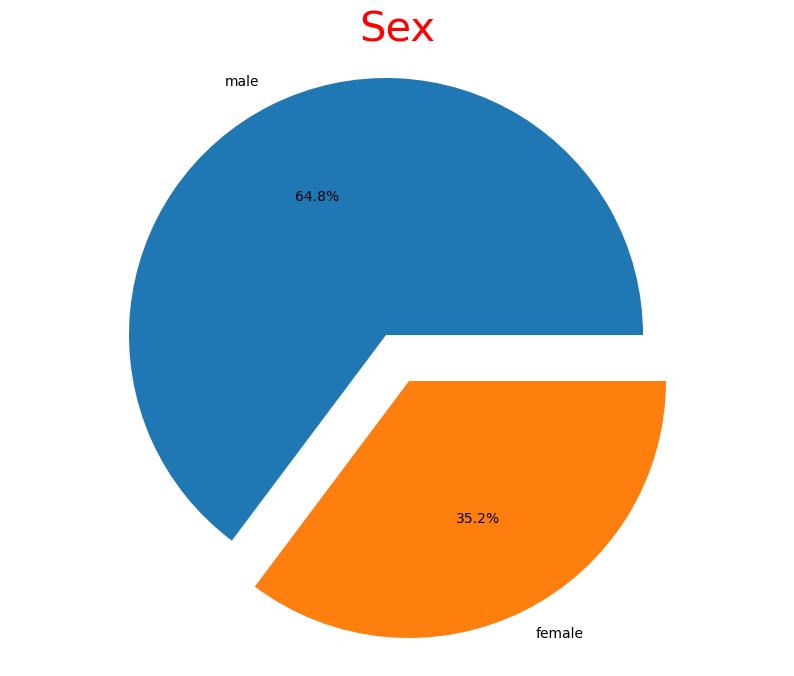

In [20]:
plt.figure(figsize=(10,8))
plt.pie([577 , 314]  , labels=["male" , "female"] , explode=[0.1 , 0.1] ,autopct= "%1.1f%%")
plt.title("Sex" , fontsize=30 , c="r" , loc="center")
plt.axis("equal")
plt.show()

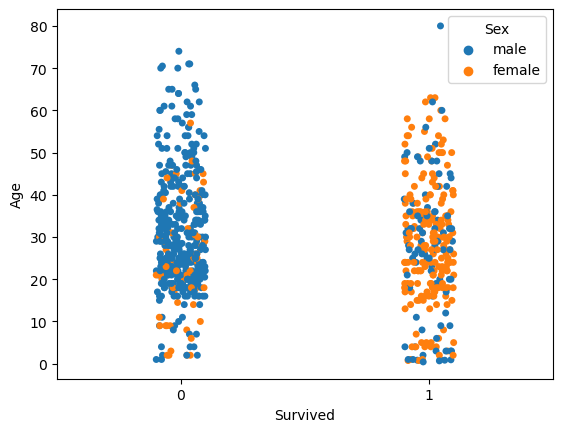

In [21]:
sns.stripplot(data=df , x="Survived" , y = "Age" , hue="Sex")
plt.show()

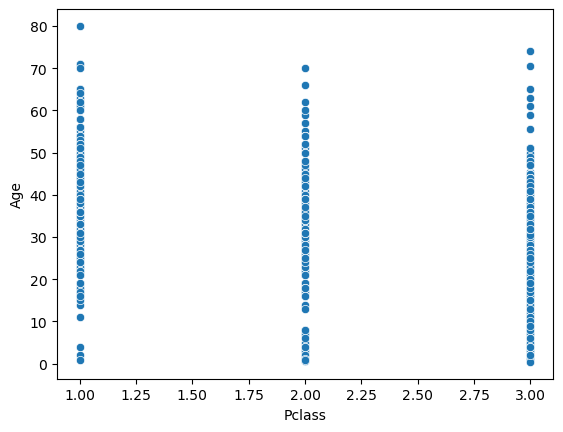

In [22]:
sns.scatterplot(data=df , x="Pclass" , y="Age")
plt.show()

In [23]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

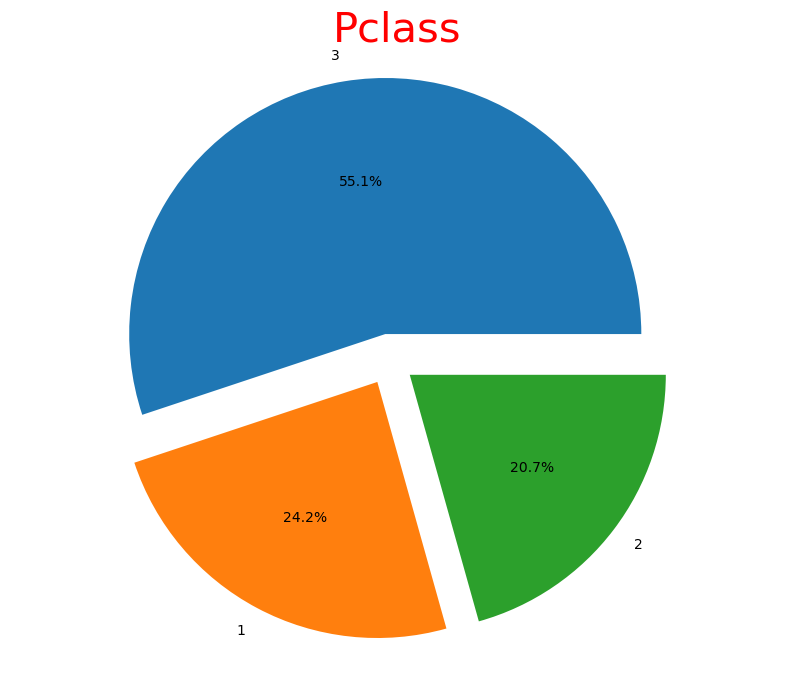

In [24]:
plt.figure(figsize=(10,8))
plt.pie([491 , 216,184]  , labels=["3" , "1","2"] , explode=[0.1 , 0.1,0.1] ,autopct= "%1.1f%%")
plt.title("Pclass" , fontsize=30 , c="r" , loc="center")
plt.axis("equal")
plt.show()

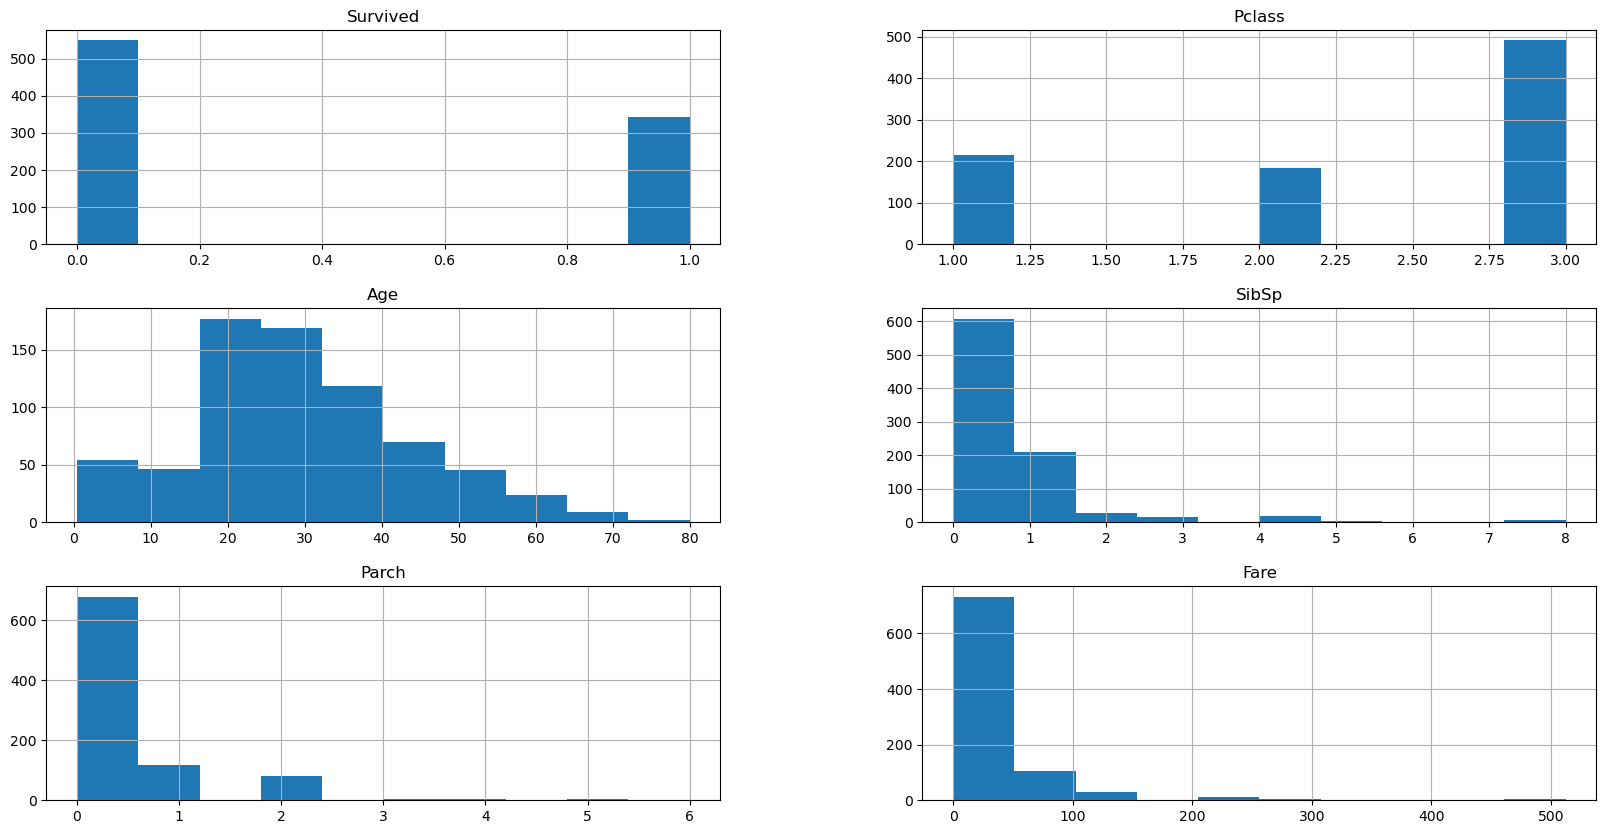

In [25]:
### histogram
df.hist( figsize=(20,10))
plt.show()

## Comment : find some skewed

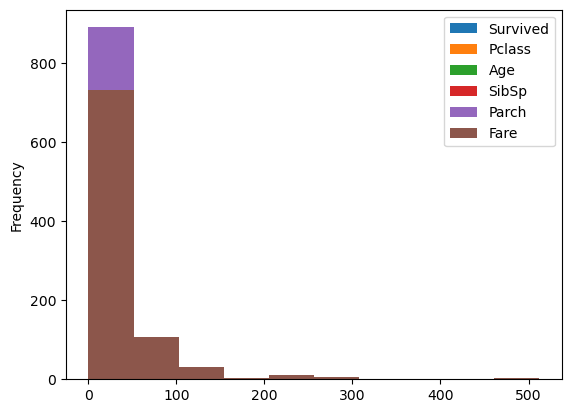

In [26]:
df.plot(kind="hist")
plt.show()

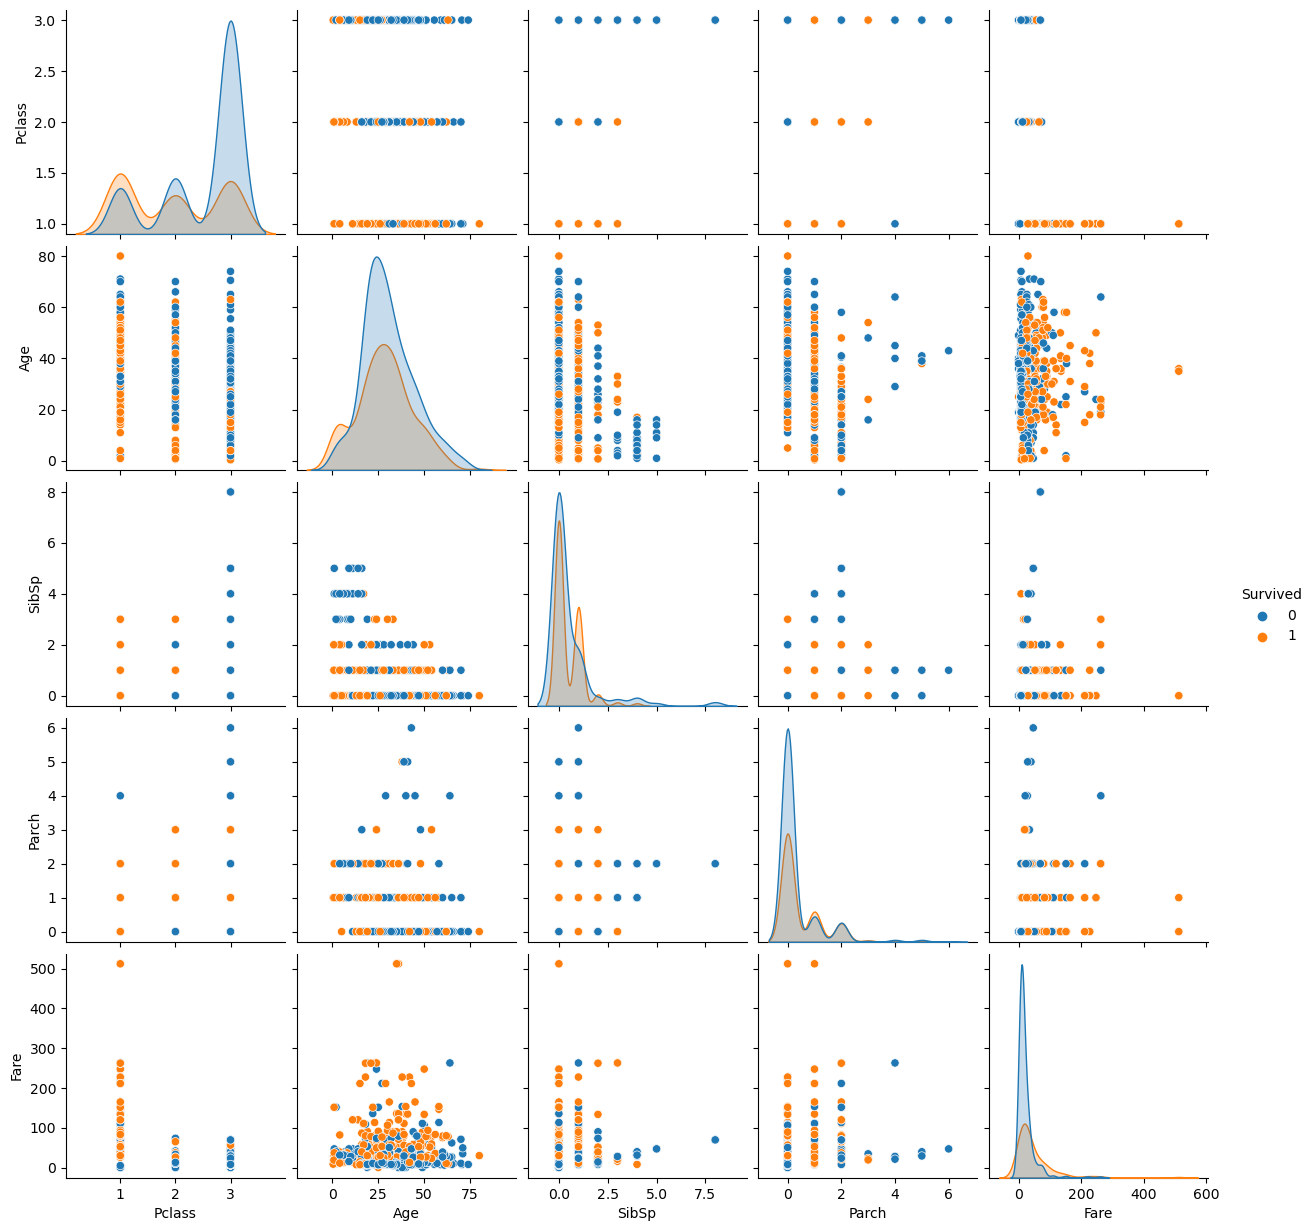

In [27]:
sns.pairplot(df,hue="Survived",diag_kind="kde")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_3056\957965121.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr() , annot=True  , cbar=True)


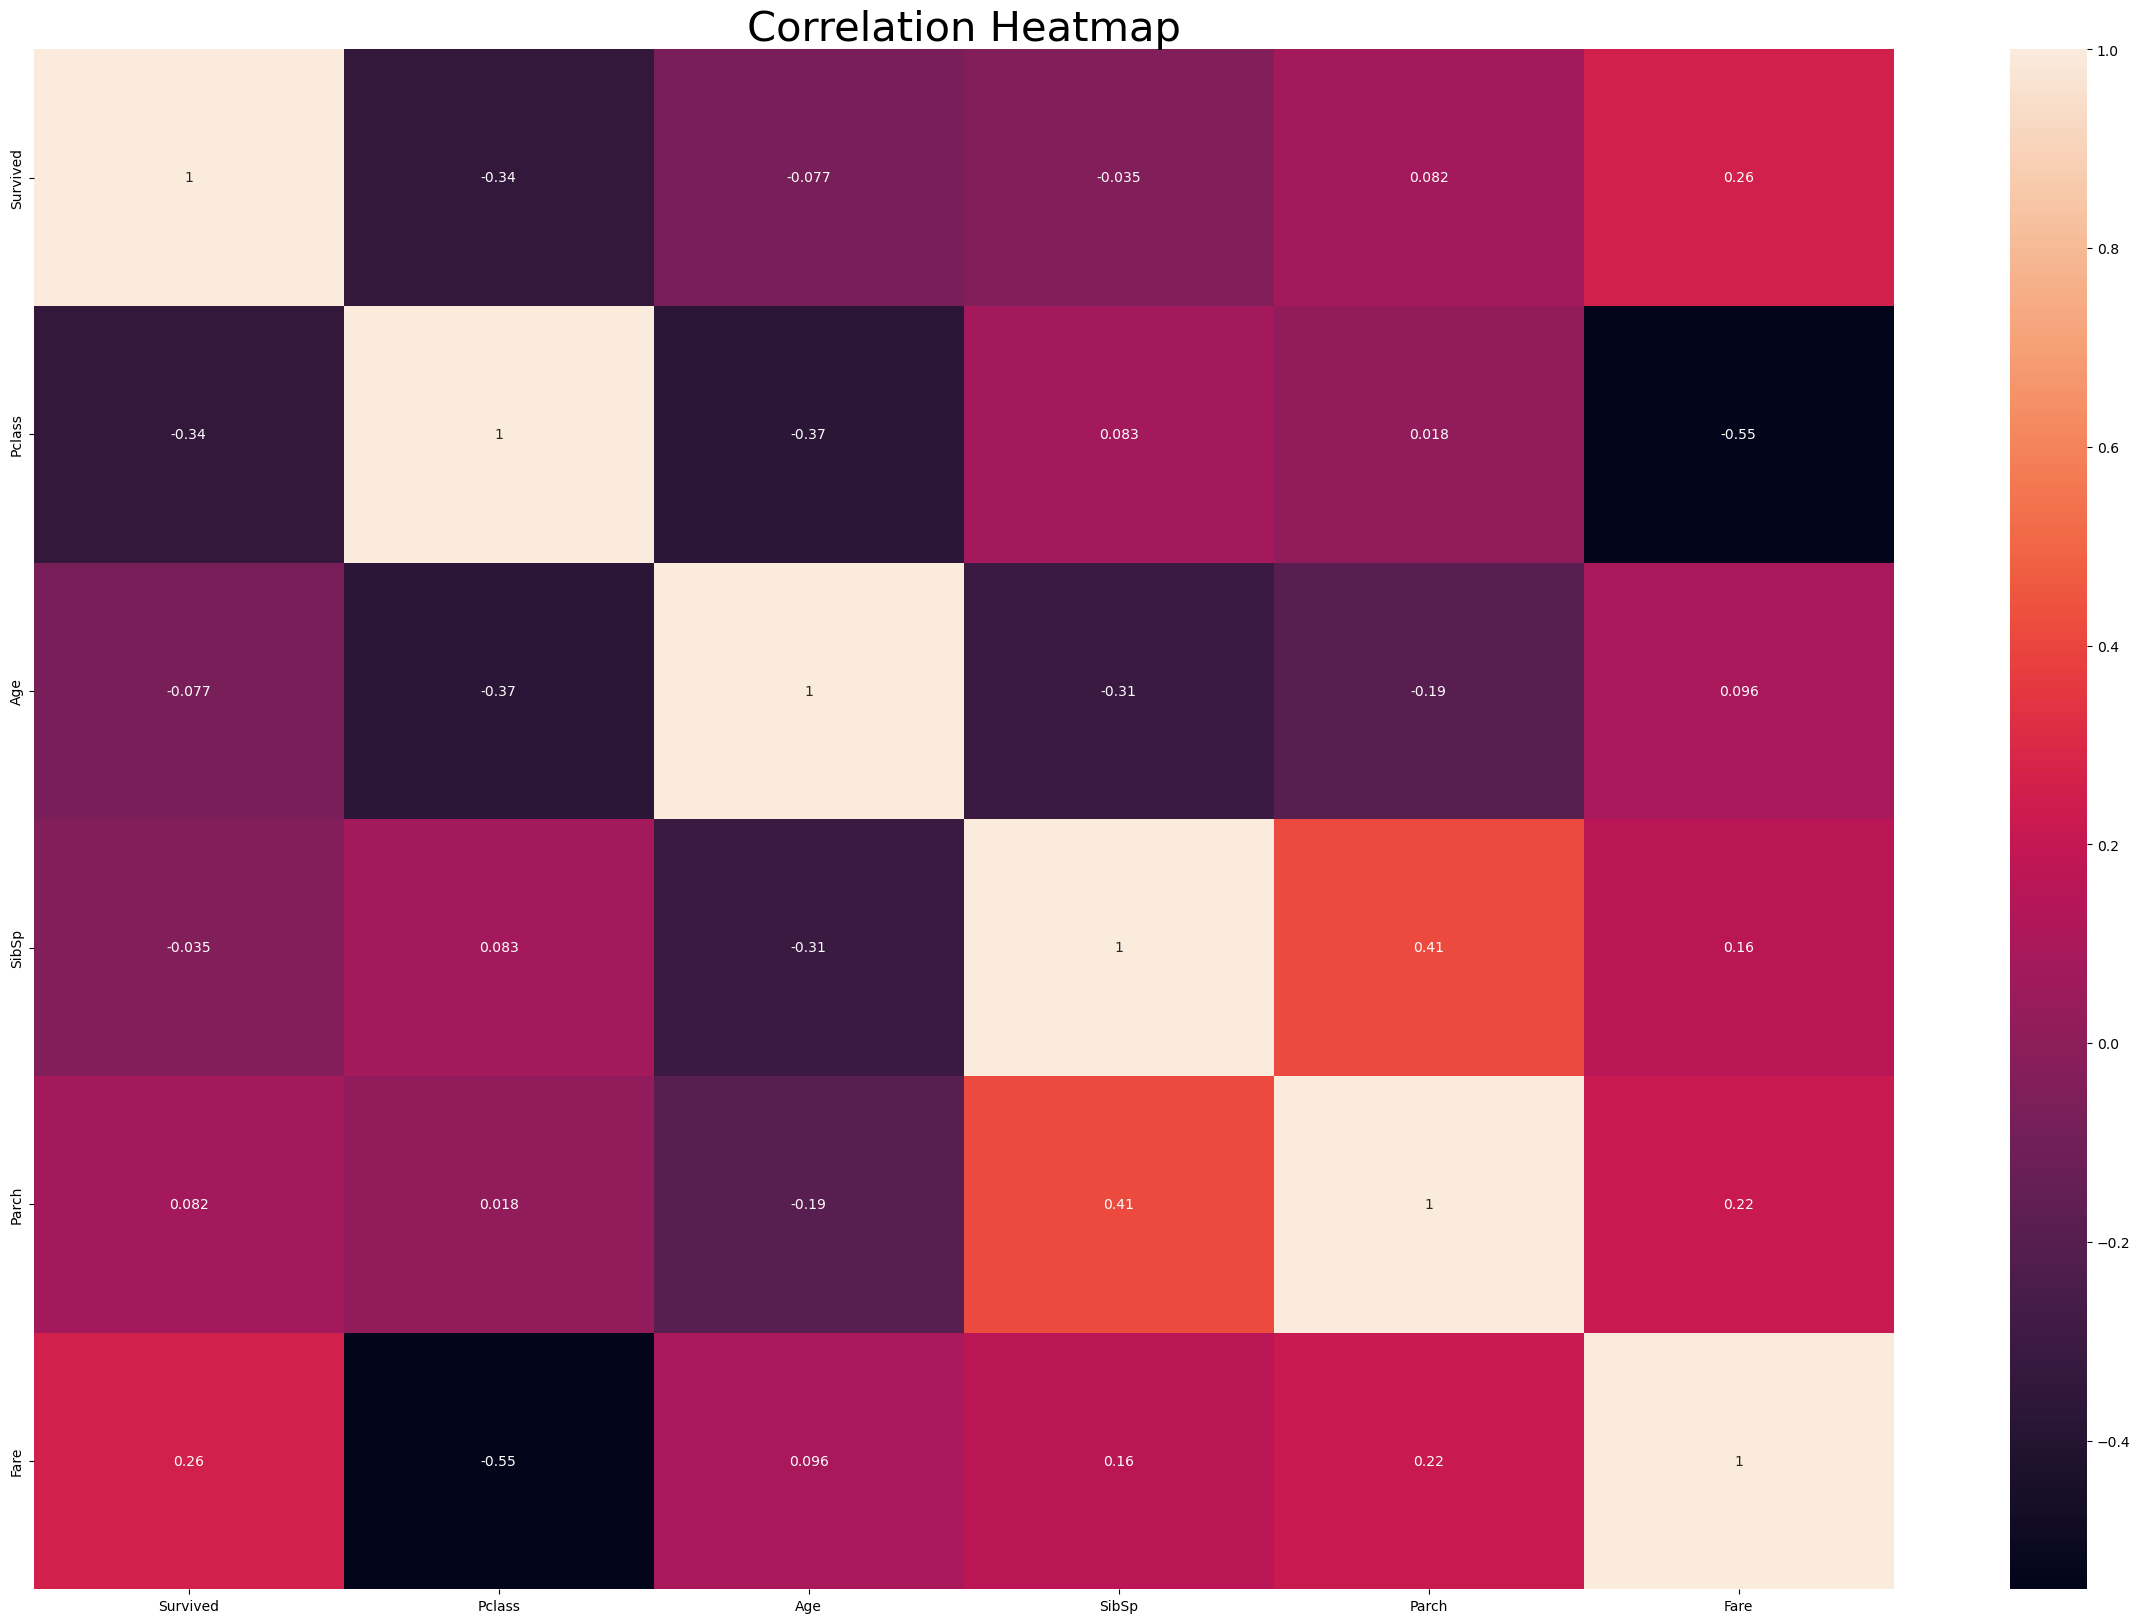

In [28]:
plt.figure(figsize=(30,20))
sns.heatmap(data=df.corr() , annot=True  , cbar=True)
plt.title("Correlation Heatmap" , fontsize=30 )
plt.show()

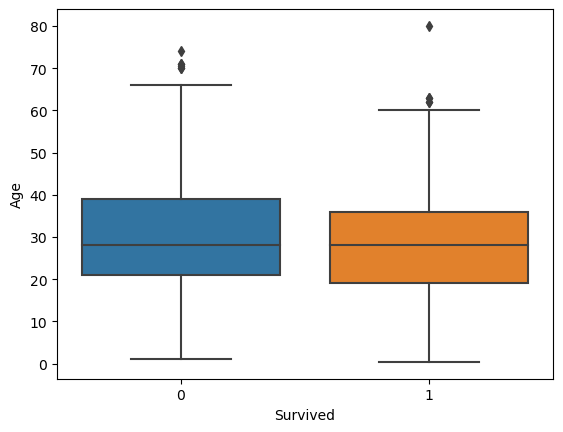

In [29]:
sns.boxplot(data=df , x="Survived" , y="Age")
plt.show()

<Axes: xlabel='Pclass', ylabel='Age'>

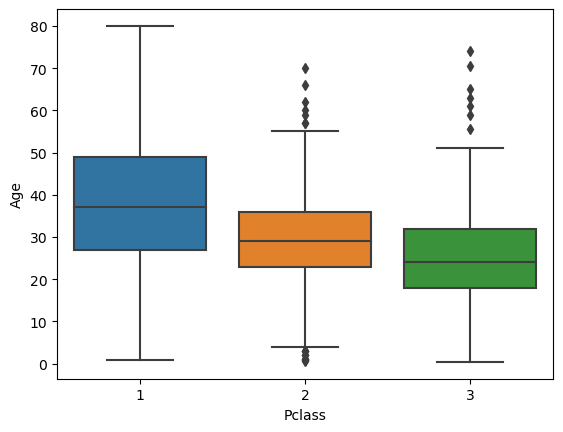

In [30]:
sns.boxplot(data=df , x="Pclass" , y="Age")

In [63]:
## preprocessing 
from sklearn.preprocessing import MinMaxScaler ,StandardScaler , LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.impute import SimpleImputer

## metrix
from sklearn.metrics import accuracy_score , classification_report , precision_recall_curve , zero_one_loss , confusion_matrix

## Algorithms

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle


## ensemble
from sklearn.ensemble import RandomForestClassifier


In [64]:
df = df.dropna()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
172,1,3,female,1.0,1,1,11.1333,S
452,0,1,male,30.0,0,0,27.7500,C
170,0,1,male,61.0,0,0,33.5000,S
620,0,3,male,27.0,1,0,14.4542,C
397,0,2,male,46.0,0,0,26.0000,S
...,...,...,...,...,...,...,...,...
98,1,2,female,34.0,0,1,23.0000,S
322,1,2,female,30.0,0,0,12.3500,Q
382,0,3,male,32.0,0,0,7.9250,S
365,0,3,male,30.0,0,0,7.2500,S


In [65]:
df = shuffle(df , random_state=123)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
175,0,3,male,18.0,1,1,7.8542,S
247,1,2,female,24.0,0,2,14.5000,S
698,0,1,male,49.0,1,1,110.8833,C
581,1,1,female,39.0,1,1,110.8833,C
132,0,3,female,47.0,1,0,14.5000,S
...,...,...,...,...,...,...,...,...
694,0,1,male,60.0,0,0,26.5500,S
93,0,3,male,26.0,1,2,20.5750,S
302,0,3,male,19.0,0,0,0.0000,S
542,0,3,female,11.0,4,2,31.2750,S


In [66]:
X = df.drop(columns=["Survived"] , axis=1)
y = df["Survived"]

## Numerical 

In [67]:
nums = [col for col in X.columns if df[col].dtype in ("int32" , "int64" , "float32" , "float64")]
nums

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

## Catigorical

In [68]:
catg = [col for col in df.columns if df[col].dtype == object]
catg

['Sex', 'Embarked']

## Covert str to int

In [69]:
label = LabelEncoder()

for col in catg:
    X[col] = label.fit_transform(X[col])
    
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
175,3,1,18.0,1,1,7.8542,2
247,2,0,24.0,0,2,14.5000,2
698,1,1,49.0,1,1,110.8833,0
581,1,0,39.0,1,1,110.8833,0
132,3,0,47.0,1,0,14.5000,2


In [70]:
## train and test
X_train_full , X_test , y_train_full , y_test = train_test_split(X , y , random_state=123 , test_size=0.15 , shuffle=True)


In [71]:
# the shapes
print(f"X_train_full shape = {X_train_full.shape}")
print(f"X_test shape = {X_test.shape}")
print(f"y_train_full shape = {y_train_full.shape}")
print(f"y_test shape = {y_test.shape}")

X_train_full shape = (605, 7)
X_test shape = (107, 7)
y_train_full shape = (605,)
y_test shape = (107,)


In [72]:
## train and vaild
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full , y_train_full , 
                                                                 random_state=123 , test_size=0.15 , shuffle=True)


In [73]:
# the shapes
print(f"X_train shape = {X_train.shape}")
print(f"X_valid shape = {X_valid.shape}")
print(f"y_train shape = {y_train.shape}")
print(f"y_valid shape = {y_valid.shape}")

X_train shape = (514, 7)
X_valid shape = (91, 7)
y_train shape = (514,)
y_valid shape = (91,)


In [74]:
imputer = SimpleImputer(missing_values=np.nan , strategy="median")

imputer.fit(X_train)

X_train_imp = imputer.transform(X_train)
X_valid_imp = imputer.fit(X_valid)
X_test_imp = imputer.fit(X_test)

In [75]:
X_train_imp

array([[ 2.    ,  1.    ,  0.83  , ...,  1.    , 18.75  ,  2.    ],
       [ 1.    ,  1.    , 21.    , ...,  1.    , 77.2875,  2.    ],
       [ 3.    ,  1.    , 30.    , ...,  0.    ,  7.25  ,  2.    ],
       ...,
       [ 1.    ,  1.    , 40.    , ...,  0.    , 27.7208,  0.    ],
       [ 3.    ,  0.    ,  5.    , ...,  0.    , 12.475 ,  2.    ],
       [ 2.    ,  1.    , 24.    , ...,  0.    , 10.5   ,  2.    ]])

In [76]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

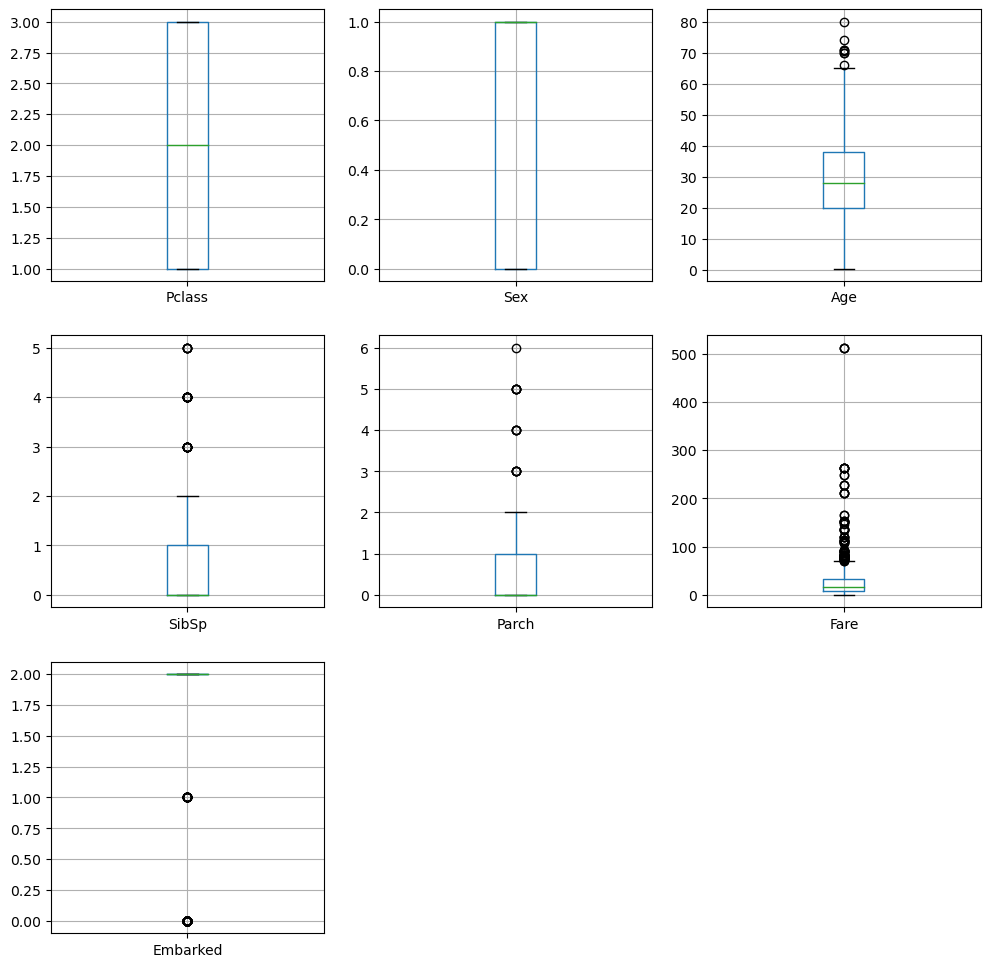

In [77]:
## Checking outliers in the graph
plt.figure(figsize=(12,12))
i=1
for col in X.columns:
    plt.subplot(3,3,i)
    X[[col]].boxplot()
    i+=1

## Solve Skewed 

In [78]:
cols = [col for col in df.columns]
cols

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [79]:
cols = [col for col in X.columns]
for col in cols:
    X[col] = np.log(X[col] + 1e-10).astype(float)


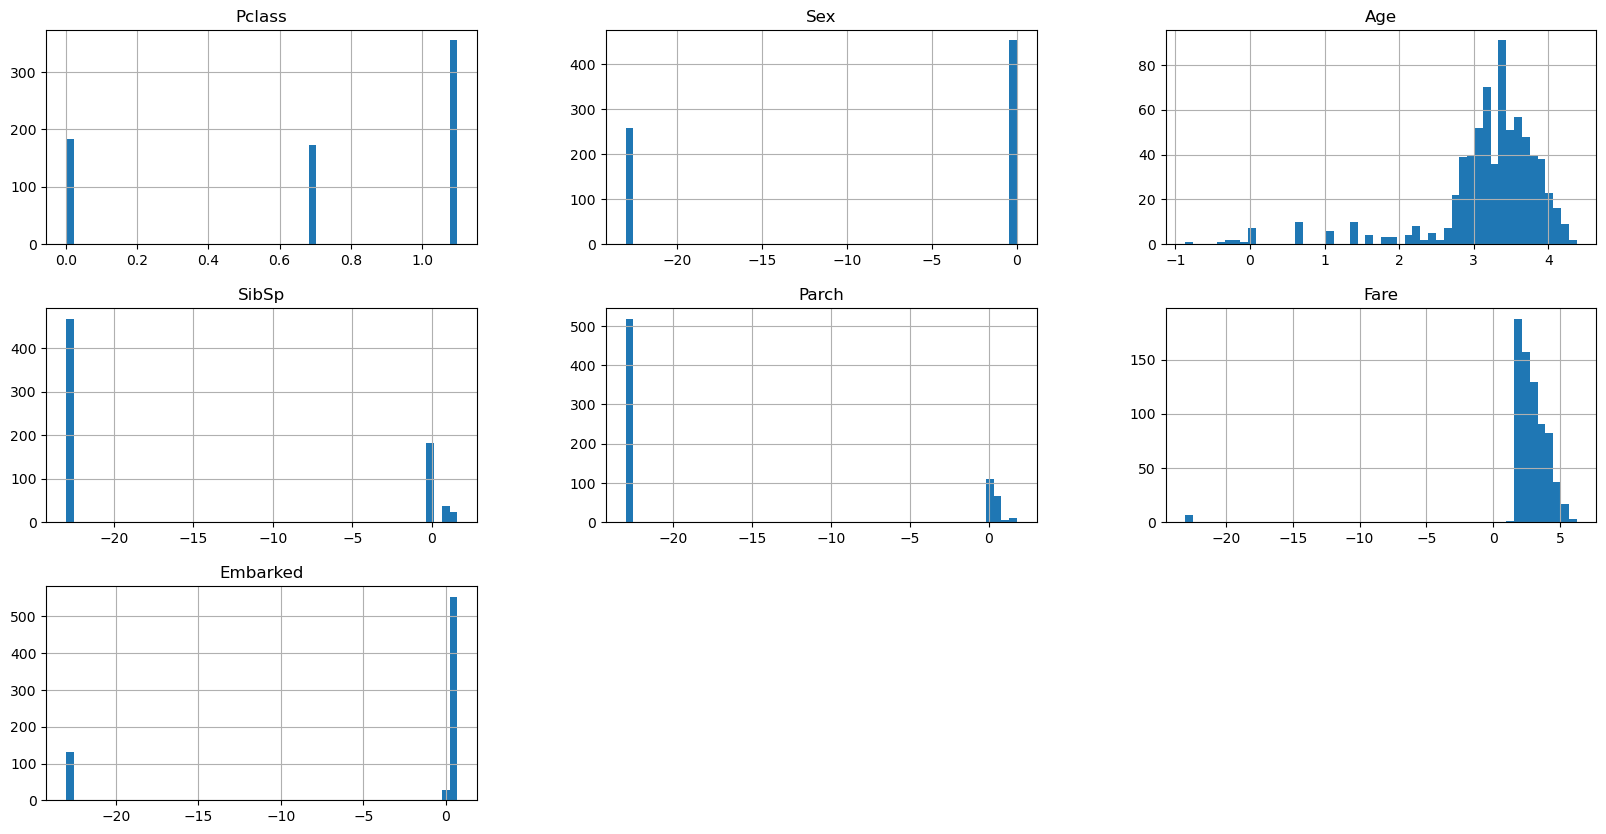

In [80]:
### histogram
X.hist(figsize=(20,10), bins=50)
plt.show()

## Model ML

## 1.KNeighborsClassifier

In [81]:
knn = KNeighborsClassifier()


In [82]:
# Define the hyperparameter grid
hyper_params = {
    "n_neighbors": [10,20,30,40,50],
    "p": [1,2],
    "metric": ['braycurtis', 'l2', 'canberra', 'correlation', 'sokalsneath', 'l1', 'sokalmichener', 'p' ]
}

# Create GridSearchCV object
random_hyper = GridSearchCV(
    knn,
    hyper_params,
    scoring="neg_root_mean_squared_error",
    cv=3,
    n_jobs=-1
)

# Fit the model
random_model = random_hyper.fit(X_train, y_train)


In [83]:
print(f"The best paramter : \n{random_model.best_params_}")

The best paramter : 
{'metric': 'canberra', 'n_neighbors': 10, 'p': 1}


In [84]:
knn = KNeighborsClassifier(n_neighbors =random_model.best_params_["n_neighbors"],
                  p=random_model.best_params_["p"],
                  metric= random_model.best_params_["metric"])
knn.fit(X_train_imp , y_train)

KNeighborsClassifier(metric='canberra', n_neighbors=10, p=1)

In [85]:
print("score train is ==>",knn.score(X_train , y_train))
print("score test is ==>",knn.score(X_test,y_test))

score train is ==> 0.8249027237354085
score test is ==> 0.822429906542056


D:\anacanda\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
D:\anacanda\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


## 2.RandomForestClassifier

In [86]:
RFC = RandomForestClassifier()
RFC.fit(X_train , y_train)

RandomForestClassifier()

In [88]:
# Define the hyperparameter grid
hyper_params = {
    "n_estimators": [200, 300, 400,500,600],
    "max_depth": [20, 30, 40, 50, 80, 100, 120],
    "criterion": ['entropy', 'gini', 'log_loss']
}

# Create GridSearchCV object
random_hyper = GridSearchCV(
    RFC,
    hyper_params,
    scoring="neg_mean_squared_error",
    cv=3,
    n_jobs=-1
)

# Fit the model
random_model = random_hyper.fit(X_train, y_train)


In [89]:
mylist = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
importance = random_model.best_estimator_.feature_importances_
# print(importance)
# print(mylist)
names = X_train.columns.tolist()
print("names" , names)
for _ in range(X_train.shape[1]):
    print((names[_] , importance[[_]]))

names ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
('Pclass', array([0.08421911]))
('Sex', array([0.24790462]))
('Age', array([0.29325439]))
('SibSp', array([0.04440287]))
('Parch', array([0.04396614]))
('Fare', array([0.25943054]))
('Embarked', array([0.02682233]))


In [90]:
RFC = RandomForestClassifier(criterion=random_model.best_params_["criterion"] , 
                               max_depth=random_model.best_params_["max_depth"] ,
                               n_estimators=random_model.best_params_["n_estimators"])

RFC.fit(X_train , y_train)

RandomForestClassifier(max_depth=100, n_estimators=400)

In [91]:
print("The Score Train is ===>>> ",RFC.score(X_train , y_train))
print("The Score test is ===>>> ",RFC.score(X_test , y_test))

The Score Train is ===>>>  0.9902723735408561
The Score test is ===>>>  0.822429906542056


In [92]:
y_pred = RFC.predict(X_train)
y_pred[:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [93]:
acc = accuracy_score(y_train , y_pred)
print("accuracy score is ===>>> ",acc)

accuracy score is ===>>>  0.9902723735408561


In [95]:
print(f" some details \n {classification_report(y_train , y_pred)}")

 some details 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       303
           1       1.00      0.98      0.99       211

    accuracy                           0.99       514
   macro avg       0.99      0.99      0.99       514
weighted avg       0.99      0.99      0.99       514



In [96]:
confusion = confusion_matrix(y_train , y_pred)
confusion

array([[302,   1],
       [  4, 207]], dtype=int64)

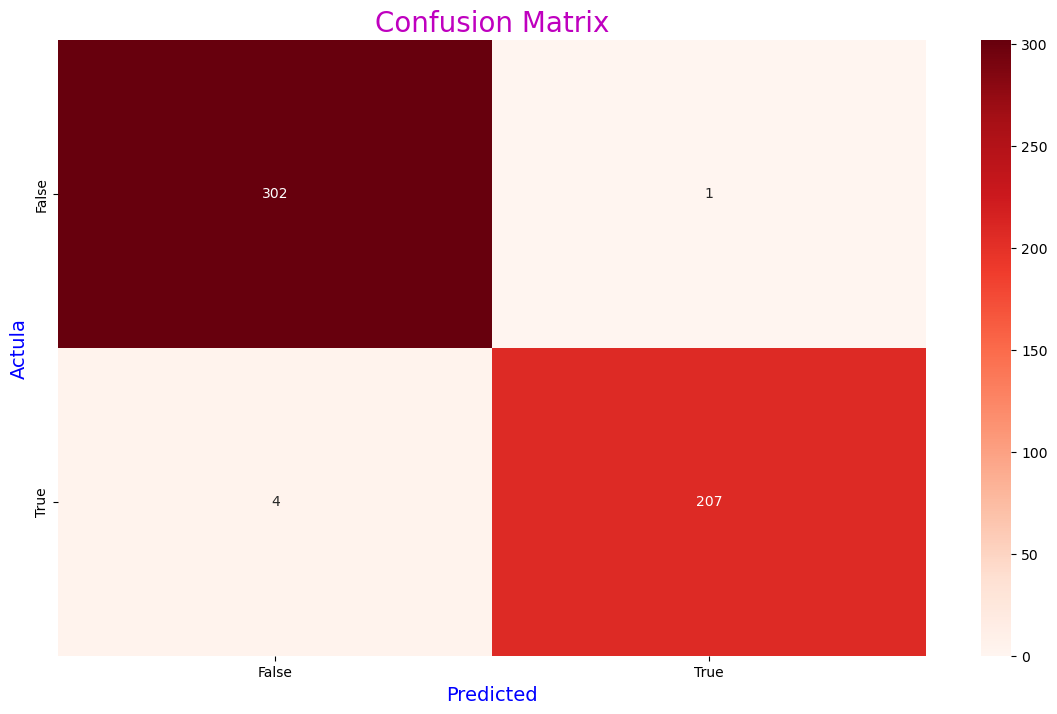

In [104]:
plt.figure(figsize=(14,8))
sns.heatmap(confusion , fmt="g" , annot=True , cbar=True , vmin=0 , cmap="Reds")
plt.xticks(ticks=np.arange(2) + 0.5 , labels=["False" , "True"])
plt.yticks(ticks=np.arange(2) + 0.5 , labels=["False" , "True"])
plt.xlabel("Predicted" , fontsize=14 , color="b")
plt.ylabel("Actula" , fontsize=14 , color="b")
plt.title("Confusion Matrix" , fontsize=20 , color="m")
plt.show()

## 3.GaussianNB

In [98]:
NB = GaussianNB()
NB.fit(X_train , y_train)

GaussianNB()

In [105]:
print("Score train is ===>> " , NB.score(X_train , y_train))
print("Score test is ===>> " , NB.score(X_test , y_test))

Score train is ===>>  0.7937743190661478
Score test is ===>>  0.7850467289719626


## End